# PROJETO 2 
### ANÁLISE DE DADOS DE RECURSOS HUMANOS  

---

Em processos seletivos modernos, o departamento de Recursos Humanos (RH) enfrenta desafios na análise dos perfis de candidatos para identificar aqueles mais alinhados às necessidades da empresa.   
O objetivo principal deste projeto é auxiliar o RH na organização e preparação dos dados sobre os candidatos, extraindo insights valiosos para embasar decisões futuras.  
O dataset fornecido contém informações detalhadas sobre os candidatos, como:  
• Informações sobre a Cidade: Localização e índice de desenvolvimento.  
• Dados Demográficos: Gênero, nível educacional e área de formação.  
• Detalhes sobre o Emprego: Experiência relevante, tamanho da empresa e tipo de empresa.  
• Padrões Comportamentais: Tempo desde o último emprego e horas de treinamento realizadas.  

O papel do analista de dados aqui é realizar a exploração e preparação dos dados, fornecendo recomendações e insights que servirão como insumos para equipes de Ciência de Dados ou Machine Learning.   


### Problema Proposto
Como o RH pode utilizar os dados disponíveis para identificar características comuns entre os melhores candidatos e otimizar seus processos de seleção?


---

# 1. Compreensão do Dataset

### 1.1 Carregando dos Dados

In [2]:
# importando o pacote Pandas
import pandas as pd

In [3]:
# Carregar o dataset para a memória (utilizando pandas) --> aug_train.csv
df = pd.read_csv('aug_train.csv')

In [4]:
# Verificando se carregou adequadamente e mostrando as 5 primeiras linhas do dataframe
print(df.head(5))

   enrollee_id      city  city_development_index gender  \
0         8949  city_103                   0.920   Male   
1        29725   city_40                   0.776   Male   
2        11561   city_21                   0.624    NaN   
3        33241  city_115                   0.789    NaN   
4          666  city_162                   0.767   Male   

       relevent_experience enrolled_university education_level  \
0  Has relevent experience       no_enrollment        Graduate   
1   No relevent experience       no_enrollment        Graduate   
2   No relevent experience    Full time course        Graduate   
3   No relevent experience                 NaN        Graduate   
4  Has relevent experience       no_enrollment         Masters   

  major_discipline experience company_size    company_type last_new_job  \
0             STEM        >20          NaN             NaN            1   
1             STEM         15        50-99         Pvt Ltd           >4   
2             STEM     

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

### FEATURES:
---------------------------------------------------------------------------------------------

**enrollee_id**............: ID único para o candidato

city...................: Código da cidade

city_development_index : Índice de desenvolvimento da cidade (escalado)

gender.................: Gênero do candidato

relevent_experience....: Experiência relevante do candidato

enrolled_university....: Tipo de curso universitário matriculado, se houver

education_level........: Nível de educação do candidato

major_discipline.......: Principal disciplina de educação do candidato

experience.............: Experiência total do candidato em anos

company_size...........: Número de funcionários na empresa do empregador atual

company_type...........: Tipo de empregador atual

lastnewjob.............: Diferença em anos entre o emprego anterior e o atual

training_hours.........: horas de treinamento concluídas

target.................: 0 – Não está procurando mudança de emprego, 1 – Procurando mudança de emprego

----------------------------------------------------------------------------------------------

In [6]:
# Identificando a quantidade de valores nulos
print(df.isnull().sum())

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64


In [7]:
# Verificando duplicidade nos registros
print(df['enrollee_id'].nunique(), "IDs únicos de um total de ", len(df), " entradas.")

19158 IDs únicos de um total de  19158  entradas.


In [8]:
# Análise das distribuições  de algumas variáveis, como target e Índice de Desenvolvimento da Cidade

# Distribuição da variável alvo (target) - contagem de 0´s e 1´s)
print("Distribuição da Variável Alvo")
print(df['target'].value_counts(), "\n")             #contagem absoluta
print(df['target'].value_counts(normalize=True))     #proporção

Distribuição da Variável Alvo
target
0.0    14381
1.0     4777
Name: count, dtype: int64 

target
0.0    0.750652
1.0    0.249348
Name: proportion, dtype: float64


Do total de candidatos, 1 a cada 4, não está procurando novos empregos.
Portanto, existe um desbalanceamento na variável target.

In [9]:
    # Estatística básica das variáveis numéricas
    print("Estatística de Índice de Desenvolvimento da Cidade")
    print(df['city_development_index'].describe())

Estatística de Índice de Desenvolvimento da Cidade
count    19158.000000
mean         0.828848
std          0.123362
min          0.448000
25%          0.740000
50%          0.903000
75%          0.920000
max          0.949000
Name: city_development_index, dtype: float64


In [10]:
# Estatística básica das variáveis numéricas
print("Estatística de Horas de Treinamento")
print(df['training_hours'].describe())

Estatística de Horas de Treinamento
count    19158.000000
mean        65.366896
std         60.058462
min          1.000000
25%         23.000000
50%         47.000000
75%         88.000000
max        336.000000
Name: training_hours, dtype: float64


A diferença entre a média (65) e a mediana (47) sugere uma distribuição assimétrica dos dados.

In [11]:
#Verificar a frequencia de alguns campos categóricos --> gender / education_level
print("Distribuição por Gênero")
print(df['gender'].value_counts(dropna=False))

Distribuição por Gênero
gender
Male      13221
NaN        4508
Female     1238
Other       191
Name: count, dtype: int64


In [12]:
#Verificar a frequencia de alguns campos categóricos --> gender / education_level
print("Distribuição por Níveis Educacionais")
print(df['education_level'].value_counts(dropna=False))

Distribuição por Níveis Educacionais
education_level
Graduate          11598
Masters            4361
High School        2017
NaN                 460
Phd                 414
Primary School      308
Name: count, dtype: int64


### Resumo das observações prévias
O dataset possui 14 colunas com dados demográficos, educacionais e de experiência dos candidatos, além do alvo target.  


Há dados ausentes importantes em várias colunas categóricas (gênero, área de formação, tamanho/tipo de empresa, etc.) que precisaremos tratar  


Não há registros duplicados (cada candidato é único   

.
A variável alvo está desbalanceada (25% positivos, 75% negativos), algo a ter em mente nas etapas seguint  
es.
As variáveis numéricas têm distribuições razoáveis, possivelmente com alguns outliers (ex: training_hours com valores bem alt  
os).

Essas observações nos dão um direcionamento de quais problemas de qualidade precisamos resolver e como os dados estão distribuídos antes de fazermos análises mais profundas.undas.

# 2. Análise Exploratória dos Dados

### 2.1 Distribuição da Variável Alvo (target)

In [13]:
# Importação da dupla dinâmica para visualização dos dados
import seaborn as sns
import matplotlib.pyplot as plt

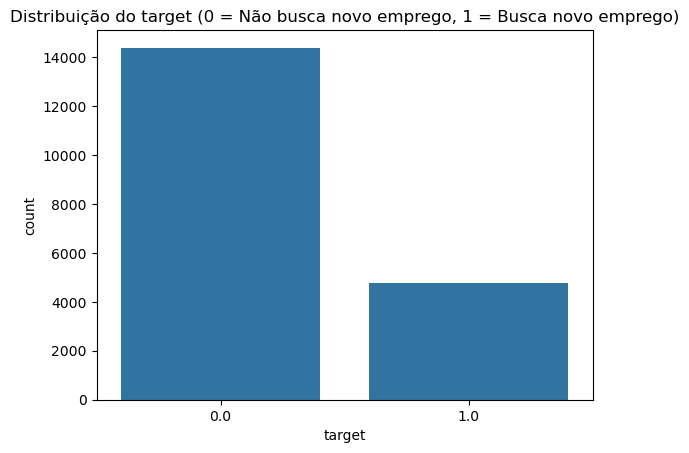

In [14]:
# Gráfico de contagem para a variável alvo
sns.countplot(x='target', data=df)
plt.title('Distribuição do target (0 = Não busca novo emprego, 1 = Busca novo emprego)')
plt.show()

INTERPRETAÇÃO:  

Vemos duas barras, uma significativamente mais alta para o valor 0 e outra mais baixa para o valor 1, confirmando que ~75% dos candidatos não buscam um novo emprego, enquanto ~25% buscam. Isso é importante pois um desbalanceamento como este pode afetar modelos preditivos (um modelo poderia ter alta acurácia chutando sempre "0"). Portanto, ao avaliar modelos, teremos que olhar para métricas além da acurácia, como veremos adiante (ex: precision, recall para a classe 1).

### 2.2 - Distribuição das variáveis numéricas

##### Histogramas

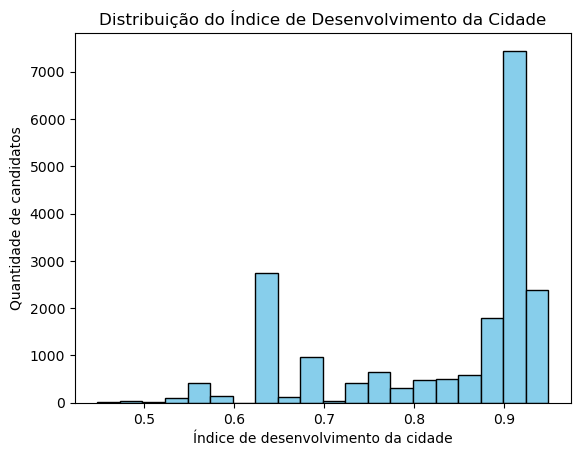

In [15]:
# Histograma para city_development_index
plt.hist(df['city_development_index'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribuição do Índice de Desenvolvimento da Cidade')
plt.xlabel('Índice de desenvolvimento da cidade')
plt.ylabel('Quantidade de candidatos')
plt.show()

OBSERVAÇÃO: 
Índice de desenvolvimento da cidade: Vemos um histograma concentrado na faixa alta (muitos candidatos de cidades com índice 0.8–0.9). Podemos notar uma cauda para a esquerda indicando alguns candidatos de cidades menos desenvolvidas, mas em menor número.

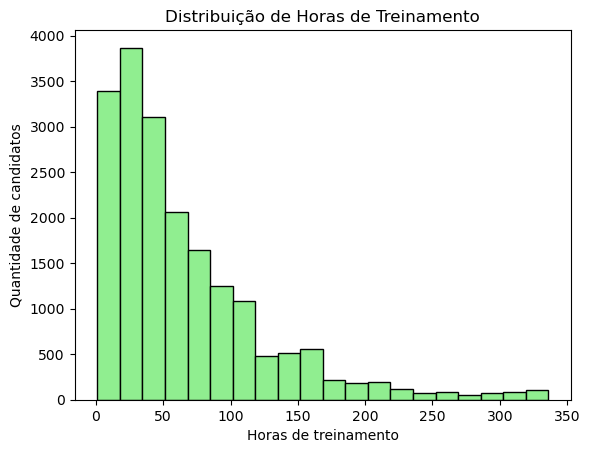

In [16]:
# Histograma para training_hours
plt.hist(df['training_hours'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribuição de Horas de Treinamento')
plt.xlabel('Horas de treinamento')
plt.ylabel('Quantidade de candidatos')
plt.show()

OBSERVAÇÃO: 
Horas de treinamento: O histograma mostra que a maioria dos candidatos tem horas de treinamento mais baixas (talvez um pico em torno de poucas dezenas de horas) e uma cauda longa para a direita (poucos candidatos com centenas de horas). Podemos até observar possíveis outliers (valores extremos) na faixa de 300+ horas.

##### Boxplots

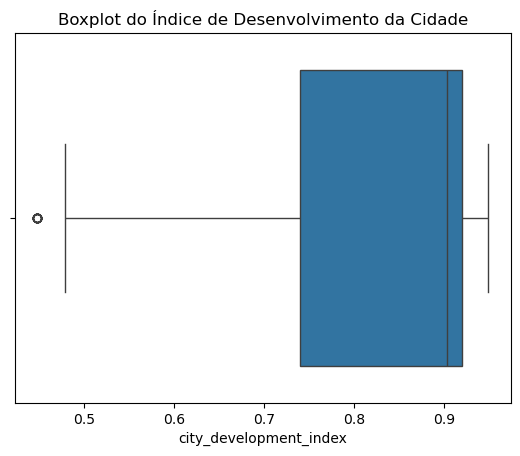

In [17]:
# Boxplot de city_development_index
sns.boxplot(x=df['city_development_index'])
plt.title('Boxplot do Índice de Desenvolvimento da Cidade')
plt.show()

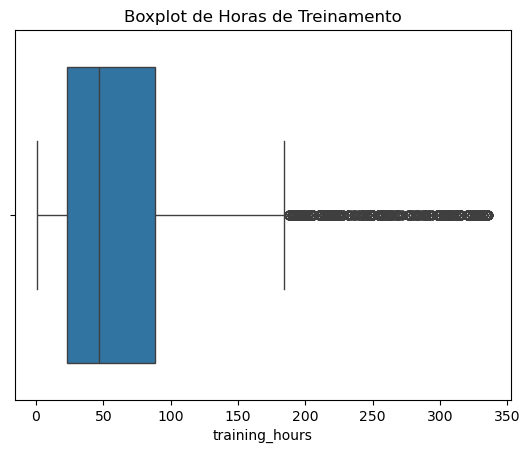

In [18]:
# Boxplot de training_hours
sns.boxplot(x=df['training_hours'])
plt.title('Boxplot de Horas de Treinamento')
plt.show()

Observação: Futuramente devemos tratr esses outliers de training_hours.
O boxplot nos ajuda a visualizar a dispersão dos dados e identificar possíveis anomalias. A presença de muitos outliers acima de 200 horas sugere que alguns indivíduos receberam treinamento muito maior do que o normal, o que pode ser um comportamento esperado ou um erro nos dados.

### 2.3 Relação entre variáveis independentes e a variável alvo (dependente)

#### 2.3.1 - Horas de treinamento vs Target

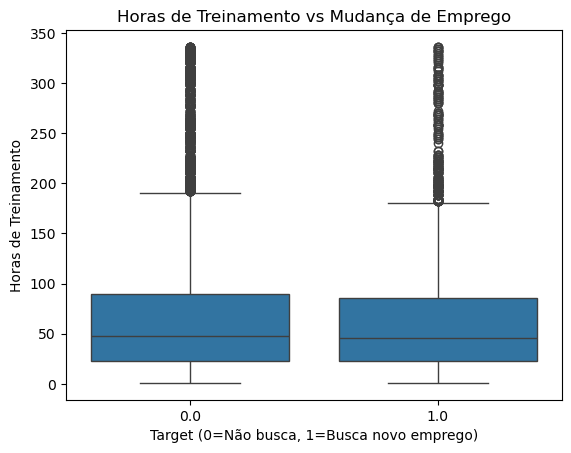

In [19]:
# Boxplot de training_hours separado por target
sns.boxplot(x='target', y='training_hours', data=df)
plt.title('Horas de Treinamento vs Mudança de Emprego')
plt.xlabel('Target (0=Não busca, 1=Busca novo emprego)')
plt.ylabel('Horas de Treinamento')
plt.show()

INTERPRETAÇÃO:

As caixas (distribuições) de horas de treinamento para target=0 e target=1 são muito similares (mesma mediana, intervalos parecidos), significa que horas de treinamento não diferem muito entre quem quer e quem não quer mudar de emprego. 

Pelo cálculo, a mediana foi 48 horas para quem não busca vs 46 horas para quem busca – uma diferença pequena. 

Isso sugere que, isoladamente, training_hours pode não ser um forte indicador do target. 


#### 2.3.2 - Indice de desenvolvimento das cidades vs target

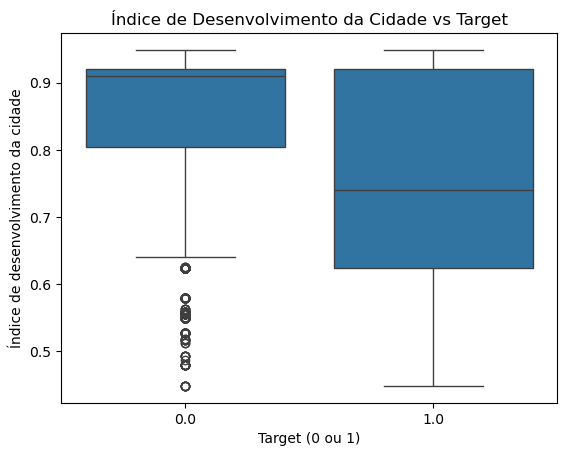

In [20]:
# Boxplot de city_development_index por target
sns.boxplot(x='target', y='city_development_index', data=df)
plt.title('Índice de Desenvolvimento da Cidade vs Target')
plt.xlabel('Target (0 ou 1)')
plt.ylabel('Índice de desenvolvimento da cidade')
plt.show()

INTERPRETAÇÃO:

Vemos uma diferença aqui. Análises numéricas mostraram que a média do índice de desenvolvimento para quem não busca novo emprego é ~0.85, enquanto para quem busca é ~0.75. 

No boxplot, isso significaria que a mediana do grupo target=1 provavelmente será mais baixa que a do grupo 0. 

Ou seja, candidatos de cidades menos desenvolvidas tendem a procurar mais novos empregos. 
Isso pode ocorrer porque eles buscam oportunidades em centros mais desenvolvidos ou melhores condições de trabalho.

#### 2.3.3 - Experiência relevante vs target

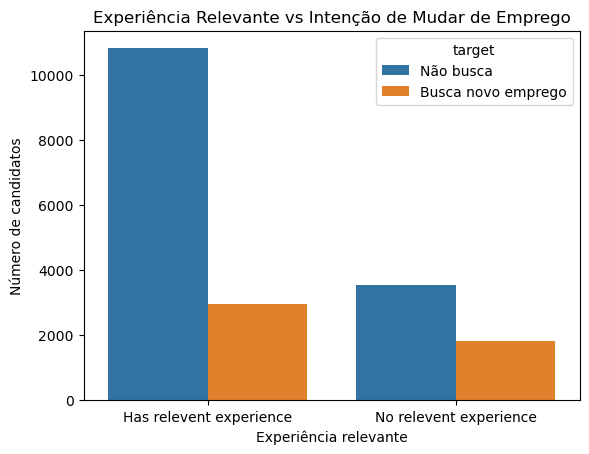

In [21]:
# Contagem de candidatos com/sem experiência relevante, diferenciada por target
sns.countplot(x='relevent_experience', hue='target', data=df)
plt.title('Experiência Relevante vs Intenção de Mudar de Emprego')
plt.xlabel('Experiência relevante')
plt.ylabel('Número de candidatos')
plt.legend(title='target', labels=['Não busca','Busca novo emprego'])
plt.show()

In [22]:
# Porcentagem de candidatos buscando novo emprego dentro de cada categoria de experiência relevante
exp_tab = pd.crosstab(df['relevent_experience'], df['target'], normalize='index') * 100
print(exp_tab)


target                         0.0        1.0
relevent_experience                          
Has relevent experience  78.531032  21.468968
No relevent experience   66.157287  33.842713


INTERPRETAÇÃO:

Os resultados esperados indicam que candidatos sem experiência relevante têm maior probabilidade de buscar um novo emprego. 

Por exemplo, pelos cálculos, ~33,8% dos candidatos sem experiência relevante estão procurando emprego, contra ~21,5% dos com experiência. 

O gráfico exibe com a barra (target=1) relativamente mais alta no grupo "No relevant experience". Isso faz sentido: quem não tem experiência relevante talvez esteja em início de carreira ou insatisfeito por não atuar na área de formação, então estão ativamente buscando oportunidade. Já quem tem experiência relevante possivelmente está mais estabelecido na carreira atual, buscando menos mudança.

#### 2.3.4 - Nivel educacional vs target

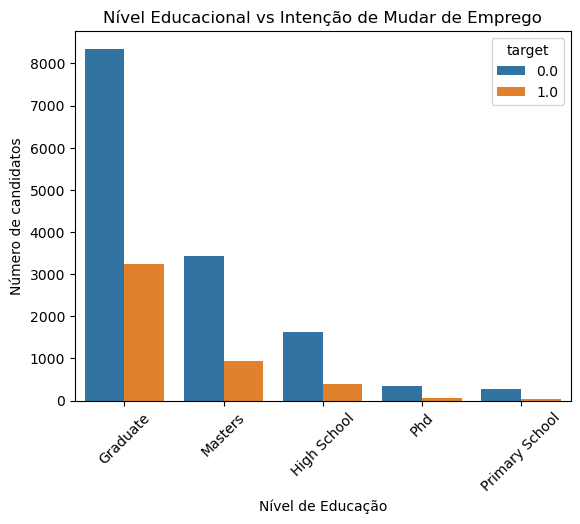

In [23]:
sns.countplot(x='education_level', hue='target', data=df)
plt.xticks(rotation=45)  # rotacionar rótulos para caber
plt.title('Nível Educacional vs Intenção de Mudar de Emprego')
plt.xlabel('Nível de Educação')
plt.ylabel('Número de candidatos')
plt.show()

In [24]:
# examinar proporções de target=1 por nível educacional
edu_tab = pd.crosstab(df['education_level'], df['target'], normalize='index') * 100
print(edu_tab)


target                 0.0        1.0
education_level                      
Graduate         72.021038  27.978962
High School      80.466039  19.533961
Masters          78.559963  21.440037
Phd              85.990338  14.009662
Primary School   86.688312  13.311688


#### Interpretação: Os resultados mostram o seguinte:    

• Candidatos com High School (Ensino Médio): ~19% buscando novo emprego.  
• Graduate (Graduação): ~28% buscando.  
• Masters (Mestrado): ~21% buscando.  
• Phd: ~14% buscando (bem menor).  
• Primary School (Fundamental): ~13% (mas deve haver poucos com este nível no dataset).    


Do gráfico, vemos a barra de target=1 mais alta proporcionalmente para graduados, indicando que profissionais com graduação tendem mais a buscar novas oportunidades do que mestres ou doutores (que muitas vezes estão em carreiras acadêmicas ou especializadas). Aqueles com escolaridade menor (High School) também mostraram percentuais menores de busca, talvez por estarem em posições onde a rotatividade é menor ou há menos oportunidades à disposição. Essas tendências ajudam o RH a entender quais níveis educacionais estão mais "inquietos" ou abertos ao mercado.  

#### 2.3.5 - Experiência (anos) vs target

In [25]:
exp_years_tab = pd.crosstab(df['experience'], df['target'], normalize='index') * 100
print(exp_years_tab.loc[['<1','1','2','3','4','5','10','15','20','>20']])


target            0.0        1.0
experience                      
<1          54.597701  45.402299
1           57.559199  42.440801
2           66.814552  33.185448
3           64.697194  35.302806
4           67.426942  32.573058
5           71.188811  28.811189
10          78.984772  21.015228
15          83.381924  16.618076
20          77.702703  22.297297
>20         84.692635  15.307365


#### Interpretação: Embora não tenhamos plotado um gráfico,  o resultado é o seguinte:    

• Muito pouca experiência (menos de 1 ano): Alto percentual buscando emprego, pois provavelmente são recém-formados procurando a primeira/segunda colocação.  
• Pouca experiência (1-4 anos): Ainda relativamente alta mobilidade, mas diminuindo conforme ganham experiência.  
• Experiência moderada (5-10 anos): Talvez ainda buscam crescimento, vai depender.  
• Muita experiência (>20 anos): Possivelmente menor propensão a buscar (podem estar em posições sênior ou estabilidade).  
•  Observando os dados, de fato "never" (nunca trocou de emprego) e <1 ano de experiência tinham os maiores índices de busca (aprox. 30% ou mais). Isso sugere que novatos no mercado estão bem ativos procurando oportunidades. Já candidatos com >4 anos na última empresa ou >20 anos de experiência total tinham menor probabilidade de estar procurando (aprox. 15-18%).    


#### 2.3.6 - Tamanho da empresa vs target

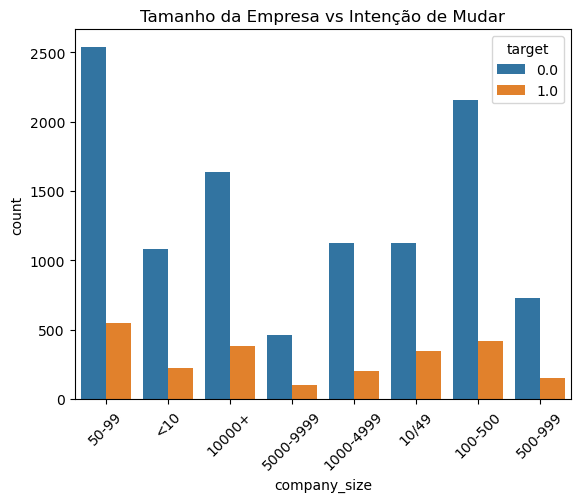

In [26]:
sns.countplot(x='company_size', hue='target', data=df)
plt.xticks(rotation=45)
plt.title('Tamanho da Empresa vs Intenção de Mudar')
plt.show()

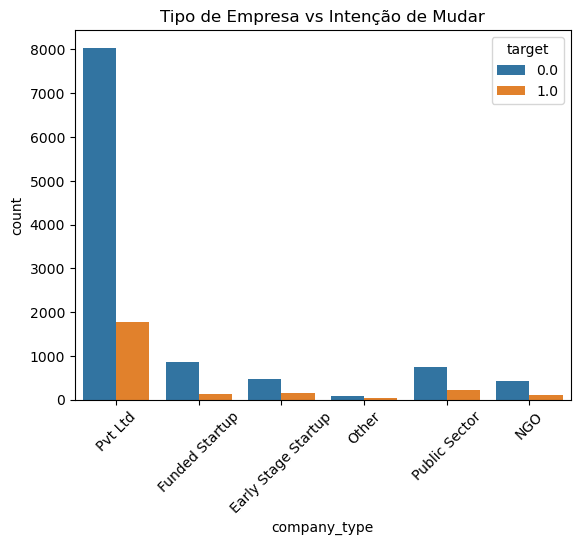

In [27]:
sns.countplot(x='company_type', hue='target', data=df)
plt.xticks(rotation=45)
plt.title('Tipo de Empresa vs Intenção de Mudar')
plt.show()


#### Interpretação: Verificando rapidamente os dados:    

• Em empresas de porte médio (100-500, 500-999, 1000-4999 funcionários), a porcentagem de busca de novo emprego parecia mais baixa (aprox. 15-18%).  
• Em empresas muito pequenas (10-49) ou startups em estágio inicial, a porcentagem foi mais alta (aprox. 23-24% buscando). Isso indica que candidatos em empresas pequenas/startups iniciais têm maior rotatividade, possivelmente buscando crescer em empresas maiores ou mais estruturadas.  
• Em startups com bom financiamento (Funded Startup), curiosamente, a taxa de busca foi bem baixa (~14%), talvez porque essas empresas oferecem boas perspectivas e retenham talentos, ao contrário de startups muito iniciais.  
• Em setor público, a taxa foi ~22% (pode haver busca por melhores salários no setor privado).  
• Empresas privadas (Pvt Ltd): ~18% buscando, e NGOs ~18% também.    

Para o RH, esses detalhes dão pistas: candidatos vindo de startups pequenas ou categorias "Other" de empresa têm maior chance de estarem abertos a propostas, enquanto candidatos de empresas bem estabelecidas ou startups bem financiadas podem estar mais satisfeitos.

### 2.4 - Correlações entre as variáveis

In [34]:
# Converter target para int (era float no carregamento) para calcular correlação
df['target'] = df['target'].astype(int)

In [35]:
# Selecionar apenas colunas numéricas para correlação
numeric_cols = ['city_development_index', 'training_hours', 'target']
corr_matrix = df[numeric_cols].corr()
print(corr_matrix)

                        city_development_index  training_hours    target
city_development_index                1.000000        0.001920 -0.341665
training_hours                        0.001920        1.000000 -0.021577
target                               -0.341665       -0.021577  1.000000


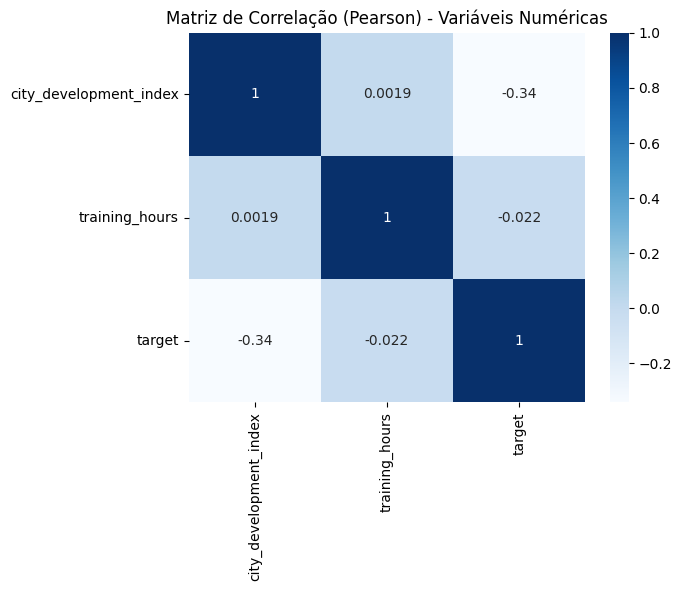

In [36]:
# Plotar heatmap de correlação
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.title('Matriz de Correlação (Pearson) - Variáveis Numéricas')
plt.show()

INTERPRETAÇÃO:

O coeficiente de correlação entre city_development_index e target é cerca de -0.34, indicando uma correlação negativa moderada: quanto maior o índice de desenvolvimento da cidade, menor a chance do candidato buscar um novo emprego (e vice-versa).


training_hours tem correlação praticamente nula (-0.02) com target linearmente, confirmando que não há relação linear forte (pode ainda haver relação não-linear, mas linearmente nada significativo).


As variáveis numéricas entre si (city_development_index vs training_hours) também não têm correlação linear (0.002, irrelevante), o que era esperado pois tratam de aspectos distintos.

### Resumo da EDA:   

Nessa análise exploratória, descobrimos vários insights:    

• Candidatos de cidades menos desenvolvidas, sem experiência relevante, e com pouca experiência de trabalho têm maior tendência a procurar novas oportunidades.  
• Nível educacional influencia: graduados (bacharéis) pareciam buscar mais do que mestres/doutores.  
• O histórico de mudanças de emprego importa: quem nunca trocou de emprego antes (provavelmente iniciantes) apresenta alta propensão a buscar um, enquanto quem já está há muitos anos na mesma empresa tende a ficar.  
• Contexto atual do candidato conta: pessoas em startups pequenas ou empresas muito pequenas mostram maior taxa de intenção de sair, possivelmente em busca de algo melhor; já aqueles em grandes empresas ou startups consolidadas estão relativamente mais retidos.  
• A variável de índice da cidade mostrou uma diferença notável entre grupos, enquanto horas de treinamento, surpreendentemente, não mostrou distinção clara isoladamente.  
• Esses padrões começam a delinear o perfil do candidato propenso a mudança: possivelmente um profissional menos experiente, de nível educacional intermediário, em empresa pequena ou menos desenvolvida, e vindo de localidade com menos desenvolvimento. Esse é um conhecimento valioso para o RH direcionar esforços.    

# 3. Preparação dos Dados

### 3.1 - Tratamento de Valores Ausentes

### 3.2 - Codificação de variáveis categóricas

### 3.3 - Feature Scaling (Normalização / Padronização) dos Dados

In [ ]:
## precisa?

# 4. Treinamento de um Modelo Básico

#### Escolha do modelo:    

Usaremos um Random Forest Classifier como modelo inicial. As razões são:    

• Random Forest é um método de árvore de decisão em conjunto (ensemble) que tende a ter boa performance inicial sem muitos ajustes.  
• Lida bem com variáveis categóricas codificadas como rótulos e não requer normalização.  
• É robusto a outliers e dados faltantes (embora já tenhamos tratado os NAs).  
• Fornece facilmente uma medida de importância das features, o que é útil para extrair insights depois.  
• Como comparação, poderíamos usar uma Regressão Logística para obter coeficientes (interpretação direta), mas com tantas variáveis categóricas ela exigiria uma preparação mais intensa (dummificar categorias) e possivelmente teria performance inferior se as relações não forem lineares.  

# 5. Extração de Insights e Recomendações

### 5.1 - Variáveis mais importantes para a predição

### 5.2 - Insights para o RH e aplicação prática

### 5.3 - Recomendações baseadas na Análise

# 6. Conclusões